##  For Factors File csv

In [81]:
import pandas as pd
import numpy as np
import json
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [82]:
data = pd.read_csv("train_factors-1573207730757.csv");

In [83]:
data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,21/08/18,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,11/10/18,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,21/08/18,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,10/07/18,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,12/09/18,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [84]:
data.describe()

,Id,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
count,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000
mean,13503.500000,0.005429,-0.001005,-0.024421,-0.042420,0.041465,0.002597,0.036744,2.379582
std,7796.105021,0.941853,0.996130,0.539555,1.111309,0.976028,0.998839,1.204473,1.008681
min,1.000000,-4.114670,-4.578587,-2.609150,-6.329798,-5.480268,-4.338751,-5.347869,1.000000
25%,6752.250000,-0.596792,-0.666310,-0.300187,-0.767247,-0.518641,-0.668027,-0.688198,2.000000
50%,13503.500000,0.012104,-0.013257,-0.040786,-0.058629,0.072127,0.007417,0.081374,2.000000
75%,20254.750000,0.611574,0.669094,0.241424,0.677433,0.616538,0.674592,0.807556,3.000000
max,27006.000000,4.415048,3.822270,3.452486,4.907407,4.779911,4.075428,5.182912,4.000000


In [85]:
data.shape#checking the shape of the data

(27006, 11)

In [86]:
data.isnull().sum() # checking the null values

Id        0
date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
alpha     0
dtype: int64

In [87]:
data['date']=pd.to_datetime(data['date'].astype(str), format='%d/%m/%y') #changing the format of the date 

In [88]:
data['Date'] = pd.to_datetime(data['date']).dt.day #separating the date from the date in a new column
data['Month'] = pd.to_datetime(data['date']).dt.month # separating the Month from the date in a new column
data['Year'] = pd.to_datetime(data['date']).dt.year # separating the Year from the date in a new column
data['Weekday'] = pd.to_datetime(data['date']).dt.weekday # separating the Weekday from the date in a new column

In [89]:
data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,Date,Month,Year,Weekday
0,1,2018-08-21,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,21,8,2018,1
1,2,2018-10-11,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,11,10,2018,3
2,3,2018-08-21,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,21,8,2018,1
3,4,2018-07-10,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,10,7,2018,1
4,5,2018-09-12,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,12,9,2018,2


In [90]:
data.dtypes

Id                  int64
date       datetime64[ns]
ticker             object
SF1               float64
SF2               float64
SF3               float64
SF4               float64
SF5               float64
SF6               float64
SF7               float64
alpha               int64
Date                int64
Month               int64
Year                int64
Weekday             int64
dtype: object

In [91]:
#make double $ as single $ in ticker
data['ticker'] = data['ticker'].str.replace('$$','$',regex=False)

In [98]:
data['ticker'] = data['ticker'].str.lower() #convert all the ticker to lowercase

Text(0.5, 1.0, 'Stocks with maximum frequency')

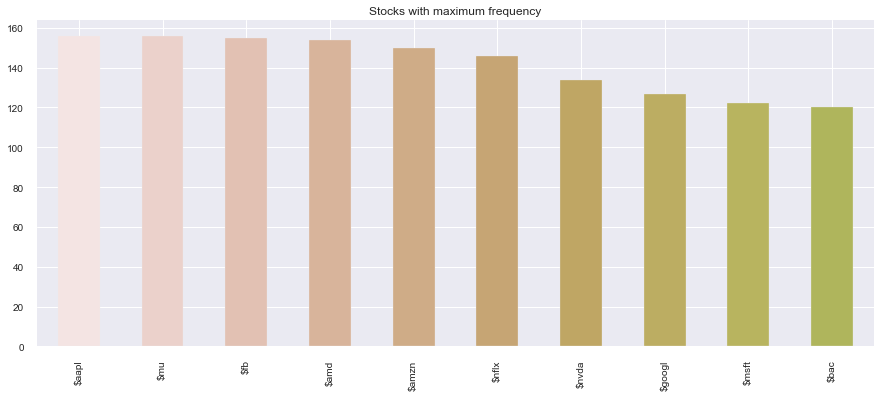

In [107]:
#Ticker Frequency 
plt.figure(figsize=(15,6))
data['ticker'].value_counts()[:10].plot(kind='bar',color=sns.color_palette('gist_earth_r',30))
plt.title('Stocks with maximum frequency')

In [ ]:
#The above plot shows the ticker according to it's frequency.

Text(0, 0.5, 'Alpha Count')

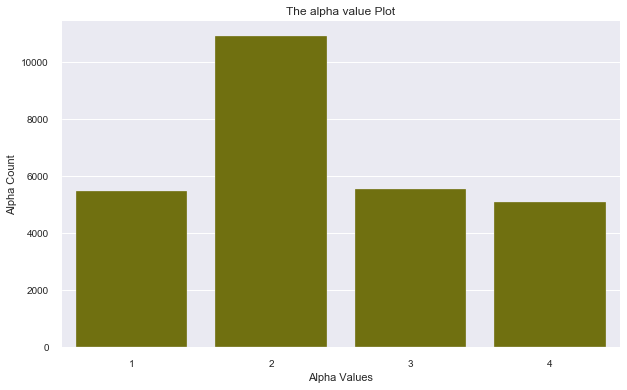

In [181]:
#The alpha value plot according to the counts
plt.figure(figsize=(10,6))
ax = sns.countplot(x='alpha', data=data,color='olive')
plt.title('The alpha value Plot')
plt.xlabel('Alpha Values')
plt.ylabel('Alpha Count')

In [ ]:
#The alpha value 2 has more frequency.

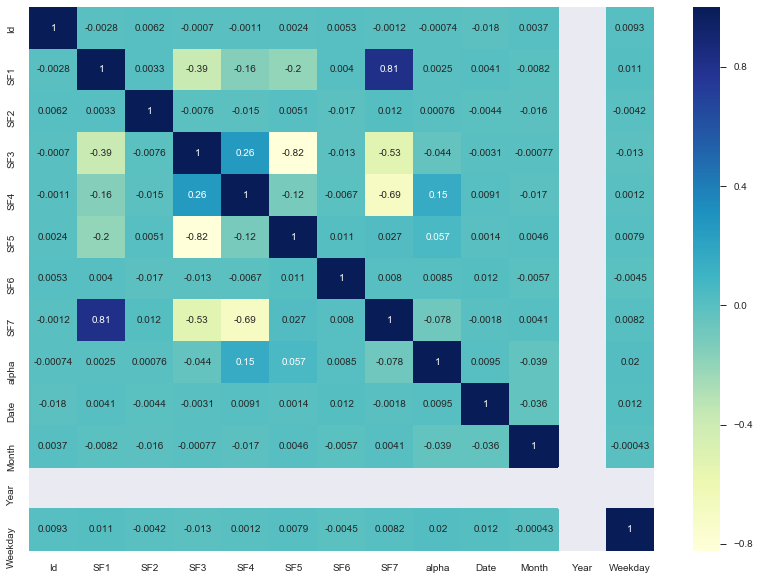

In [94]:
#Heatmap for the given data to find correlations
plt.figure(figsize = (14,10))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True )
plt.show()

In [95]:
#From the above heatmap we can see that SF7 and SF1 are highly correlated.
#SF3 and SF 5 are correlated.

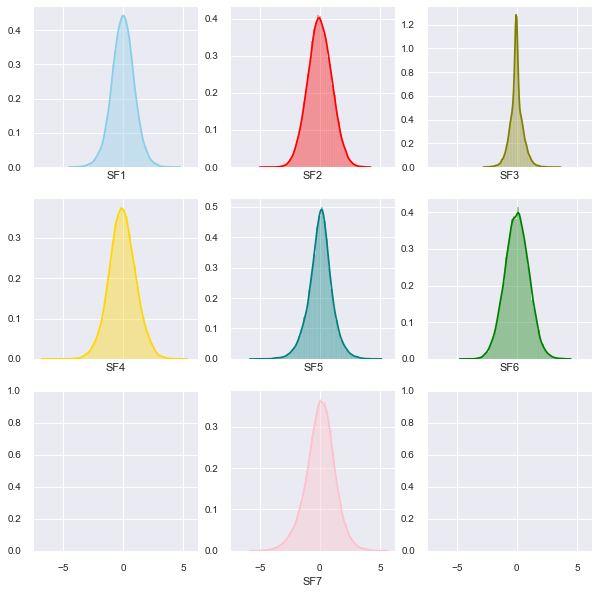

In [96]:
#The plots show the distribution about the stock factors.
f, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=True)
sns.distplot( data["SF1"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["SF2"] , color="red", ax=axes[0, 1])
sns.distplot( data["SF3"] , color="olive", ax=axes[0, 2])
sns.distplot( data["SF4"] , color="gold", ax=axes[1, 0])
sns.distplot( data["SF5"] , color="teal", ax=axes[1, 1])
sns.distplot( data["SF6"] , color="green", ax=axes[1, 2])
sns.distplot( data["SF7"] , color="pink", ax=axes[2, 1])

In [ ]:
#All the Stock Factors are nearly standardized.

In [99]:
data['ticker'].nunique()# number of unique ticker

872

In [100]:
data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,Date,Month,Year,Weekday
0,1,2018-08-21,$ntap,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,21,8,2018,1
1,2,2018-10-11,$wynn,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,11,10,2018,3
2,3,2018-08-21,$dri,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,21,8,2018,1
3,4,2018-07-10,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,10,7,2018,1
4,5,2018-09-12,$fe,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2,12,9,2018,2


## For Json data

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import contractions
import emoji
import html.parser as htmlparser
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from wordcloud import WordCloud, STOPWORDS 

In [4]:
from nltk.corpus import stopwords

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreya1996/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
jf = pd.read_csv('jdata.csv')

In [7]:
jf.head()

,Unnamed: 0,Tweet,Sentiment_score,Date,Stock
0,0,$AMD going up but hesitating however chart is ...,3,2018-09-19 18:38:28+00:00,$AMD
1,1,@inforlong @MariaGascon Despite\nChina trade w...,3,2018-10-09 03:51:06+00:00,$CAT
2,2,$AVGO WTF?,2,2018-07-12 13:35:32+00:00,$AVGO
3,3,$PH\n New Insider Filing On: \n MULLER KLAUS P...,2,2018-07-19 03:32:50+00:00,$PH
4,4,$FB if it bounces tommorrow do the right thing...,3,2018-08-23 19:07:54+00:00,$FB


#### separate date and time

In [8]:
#separate date and time
date = jf['Date']
dt, tm = zip(*(s.split(" ") for s in date))
jf['date'] = dt
jf['time'] = tm
jf.drop(['Date'],axis=1,inplace=True)

In [9]:
jf['Date'] = pd.to_datetime(jf['date']).dt.day
jf['Month'] = pd.to_datetime(jf['date']).dt.month
jf['Year'] = pd.to_datetime(jf['date']).dt.year
jf['Weekday'] = pd.to_datetime(jf['date']).dt.weekday

###### Parse html

In [10]:
#parsing the html part
parser = htmlparser.HTMLParser()
jf['Tweet']= jf['Tweet'].apply(lambda x: parser.unescape(x))

/Users/shreya1996/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
jf.to_csv('jsondata_parsing.csv',index="False")#saved the csv again after html parsed since long run time

In [110]:
jd = pd.read_csv("jsondata_parsing.csv")# read the file

In [111]:
jd.drop(jd.columns[[0,1]], axis = 1,inplace=True)#remove the extra index columns

In [112]:
jd.head()

,Tweet,Sentiment_score,Stock,date,time,Date,Month,Year,Weekday
0,$AMD going up but hesitating however chart is ...,3,$AMD,2018-09-19,18:38:28+00:00,19,9,2018,2
1,@inforlong @MariaGascon Despite\nChina trade w...,3,$CAT,2018-10-09,03:51:06+00:00,9,10,2018,1
2,$AVGO WTF?,2,$AVGO,2018-07-12,13:35:32+00:00,12,7,2018,3
3,$PH\n New Insider Filing On: \n MULLER KLAUS P...,2,$PH,2018-07-19,03:32:50+00:00,19,7,2018,3
4,$FB if it bounces tommorrow do the right thing...,3,$FB,2018-08-23,19:07:54+00:00,23,8,2018,3


In [113]:
#delete the url from the tweet text
delurl = []
for i in jd['Tweet']:
    delurl.append(re.sub(r"http\S+", "", i))
jd['Tweet'] = delurl

In [114]:
#remove \n from the tweets
jd['Tweet']=jd['Tweet'].str.replace("\\n", " ",regex=True)

In [115]:
#make double $ as single $
jd['Stock'] = jd['Stock'].str.replace('$$','$',regex=False)

In [116]:
#removing the stock name from tweets
x = []
for i in range(0,jd.shape[0]):
    x.append(" ".join(filter(lambda x:x[0]!='$', jd['Tweet'][i].split())))
jd['Tweet'] = x

In [117]:
#A lot of tweets had only the stock name which are now empty so we need to delete those rows
(jd['Tweet'].values == '').sum() 

24249

In [118]:
#save those tweets which has value
jd =jd[jd['Tweet']!='']

In [119]:
#lowercase the stock 
jd['Stock']=jd['Stock'].str.lower()

In [120]:
#lowercase the Tweet
jd['Tweet']=jd['Tweet'].str.lower()

In [122]:
jd.head()#displaying after converting to lowercase

,Tweet,Sentiment_score,Stock,date,time,Date,Month,Year,Weekday
0,going up but hesitating however chart is very ...,3,$amd,2018-09-19,18:38:28+00:00,19,9,2018,2
1,@inforlong @mariagascon despite china trade wa...,3,$cat,2018-10-09,03:51:06+00:00,9,10,2018,1
2,wtf?,2,$avgo,2018-07-12,13:35:32+00:00,12,7,2018,3
3,new insider filing on: muller klaus peter tran...,2,$ph,2018-07-19,03:32:50+00:00,19,7,2018,3
4,if it bounces tommorrow do the right thing and...,3,$fb,2018-08-23,19:07:54+00:00,23,8,2018,3


##### New features using the counts

In [123]:
# Number of words in a tweet
jd['word_count'] = jd['Tweet'].apply(lambda x: len(str(x).split(" ")))
jd[['Tweet','word_count']].head()

,Tweet,word_count
0,going up but hesitating however chart is very ...,12
1,@inforlong @mariagascon despite china trade wa...,10
2,wtf?,1
3,new insider filing on: muller klaus peter tran...,9
4,if it bounces tommorrow do the right thing and...,10


Text(0.5, 1.0, 'Word Count plot')

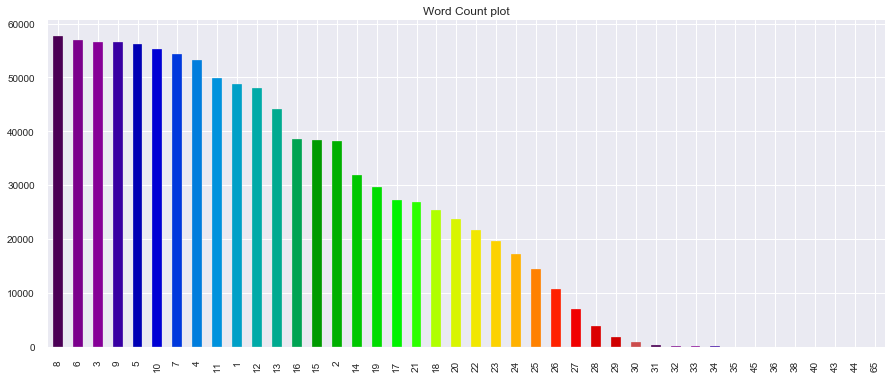

In [154]:
#Word Count
plt.figure(figsize=(15,6))
jd['word_count'].value_counts()[:60].plot(kind='bar',color=sns.color_palette('nipy_spectral',30))
plt.title('Word Count plot')

In [ ]:
#maximum tweets are with the word count of 8.

In [124]:
#char count
jd['char_count'] = jd['Tweet'].str.len() 
jd[['Tweet','char_count']].head()

,Tweet,char_count
0,going up but hesitating however chart is very ...,69
1,@inforlong @mariagascon despite china trade wa...,64
2,wtf?,4
3,new insider filing on: muller klaus peter tran...,59
4,if it bounces tommorrow do the right thing and...,51


In [125]:
#seeing the average words in a sentence
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))
jd['avg_word'] = jd['Tweet'].apply(lambda x: avg_word(x))
jd[['Tweet','avg_word']].head()

,Tweet,avg_word
0,going up but hesitating however chart is very ...,4.833333
1,@inforlong @mariagascon despite china trade wa...,5.500000
2,wtf?,4.000000
3,new insider filing on: muller klaus peter tran...,5.666667
4,if it bounces tommorrow do the right thing and...,4.200000


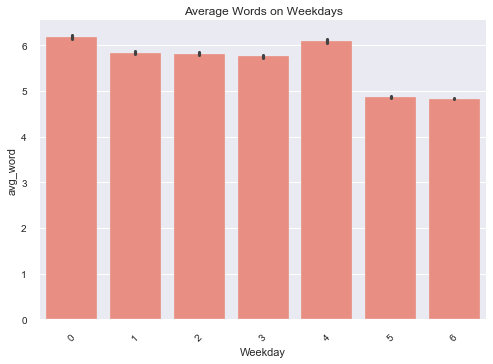

In [183]:
#average word count based on weekday
wk = jd['Weekday']
aw = jd['avg_word']
sns.barplot(x=wk, y=aw,color='salmon')
plt.xticks(rotation = 45)
plt.title('Average Words on Weekdays')
plt.show()

In [ ]:
#the average word count on monday(0), the tweets are high on weekdays compared to weekend.

In [126]:
#Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

jd['stopwords'] = jd['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
jd[['Tweet','stopwords']].head()

,Tweet,stopwords
0,going up but hesitating however chart is very ...,5
1,@inforlong @mariagascon despite china trade wa...,1
2,wtf?,0
3,new insider filing on: muller klaus peter tran...,0
4,if it bounces tommorrow do the right thing and...,5


In [127]:
#Number of hashtags
jd['hastags'] = jd['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
jd[['Tweet','hastags']].head()

,Tweet,hastags
0,going up but hesitating however chart is very ...,0
1,@inforlong @mariagascon despite china trade wa...,0
2,wtf?,0
3,new insider filing on: muller klaus peter tran...,0
4,if it bounces tommorrow do the right thing and...,0


In [41]:
#Number of numerics
jd['numerics'] = jd['Tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
jd[['Tweet','numerics']].head()

,Tweet,numerics
0,going up but hesitating however chart is very ...,0
1,@inforlong @mariagascon despite china trade wa...,0
2,wtf?,0
3,new insider filing on: muller klaus peter tran...,0
4,if it bounces tommorrow do the right thing and...,0


In [42]:
#Number of @ user
jd['username'] = jd['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
jd[['Tweet','username']].head()

,Tweet,username
0,going up but hesitating however chart is very ...,0
1,@inforlong @mariagascon despite china trade wa...,2
2,wtf?,0
3,new insider filing on: muller klaus peter tran...,0
4,if it bounces tommorrow do the right thing and...,0


#### stocks with most tweets

Text(0.5, 1.0, 'Source with most number of tweets')

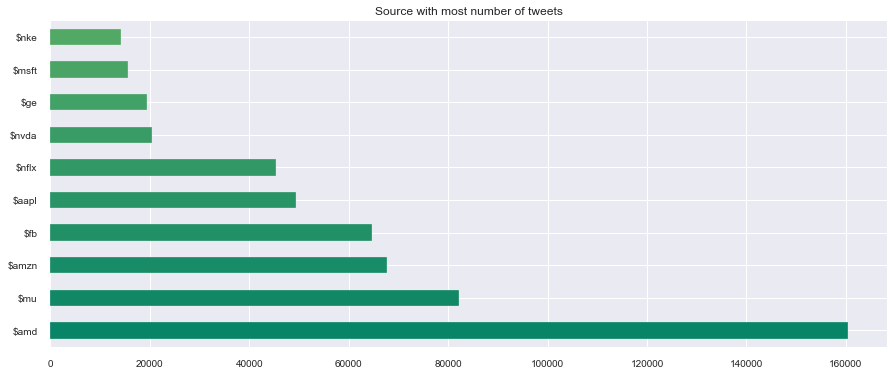

In [128]:
#Stock with most tweets
plt.figure(figsize=(15,6))
jd['Stock'].value_counts()[:10].plot(kind='barh',color=sns.color_palette('summer',30))
plt.title('Source with most number of tweets')

In [150]:
#The above plot shows that stock amd has the highest number of tweets

#### Hashtag visualization

In [129]:
from nltk.stem import WordNetLemmatizer 
lemma = WordNetLemmatizer()

In [130]:
#hashtag words extracted in a function
def extract_hashtag(Tweet):
    tw = " ".join(filter(lambda x: x[0]== '#', Tweet.split()))
    tw = re.sub('[^a-zA-Z]',' ',  tw)
    tw = [lemma.lemmatize(word) for word in tw]
    tw = "".join(tw)
    return tw

In [131]:
jd['hashtag'] = jd.Tweet.apply(extract_hashtag) # the hashtag column is passed to the function

In [132]:
# hashtag gets stored in a variable
hashtag_words = " ".join(jd.hashtag)

In [133]:
#a frequently used hashtag list
from nltk import FreqDist
freq_all_hashtag = FreqDist(list((" ".join(jd.hashtag)).split())).most_common(10)
freq_all_hashtag

[('update', 13693),
 ('staanalystalert', 3284),
 ('setupalert', 3004),
 ('elliottwave', 1462),
 ('options', 1205),
 ('earnings', 1173),
 ('maxpain', 1130),
 ('stocks', 817),
 ('facebook', 690),
 ('trading', 600)]

In [134]:
#hashtags are stored in a dataframe 
jd_hashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
print(jd_hashtag.head())

             words  frequency
0           update      13693
1  staanalystalert       3284
2       setupalert       3004
3      elliottwave       1462
4          options       1205


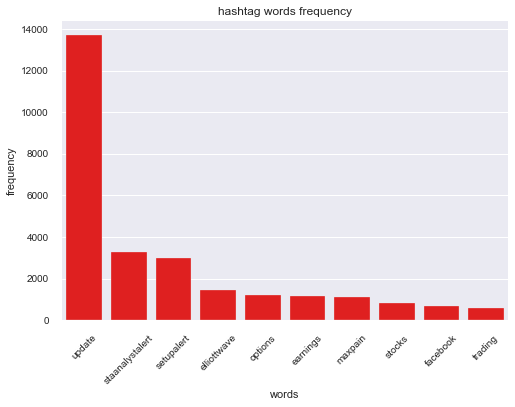

In [135]:
#Freqeuncy of hashtags
sns.barplot(x='words', y='frequency', data=jd_hashtag,color="red")
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

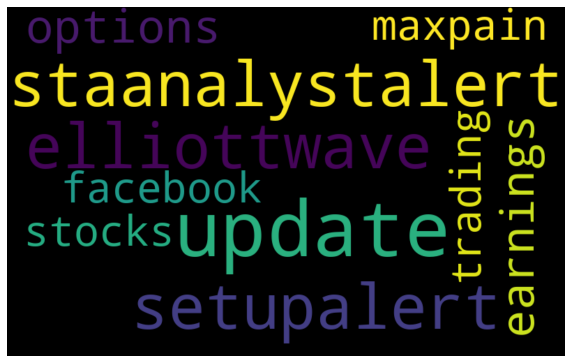

In [136]:
#Hash frequency word cloud
hash_freq =' '.join([text for text in jd_hashtag['words']])#getting the corpus of the hastag frequency
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(hash_freq)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#The words like update has the maximum trend which indicates people tweeted a new update.

#### Basic Preprocessing

In [137]:
#remove user names
jd['Tweet'] = jd['Tweet'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)", " ", x).split()))
jd['Tweet'].head()

0    going up but hesitating however chart is very ...
1             despite china trade war held very well 👍
2                                                 wtf?
3    new insider filing on: muller klaus peter tran...
4    if it bounces tommorrow do the right thing and...
Name: Tweet, dtype: object

In [138]:
#remove numerics
jd['Tweet'] = jd['Tweet'].apply(lambda x: " ".join(re.sub("[0-9]", " ", x).split()))
jd['Tweet'].head()

0    going up but hesitating however chart is very ...
1             despite china trade war held very well 👍
2                                                 wtf?
3    new insider filing on: muller klaus peter tran...
4    if it bounces tommorrow do the right thing and...
Name: Tweet, dtype: object

In [139]:
#translating emoji into text
jd['Tweet'] = jd['Tweet'].apply(lambda x: emoji.demojize(x))
jd['Tweet'].head()

0    going up but hesitating however chart is very ...
1    despite china trade war held very well :thumbs...
2                                                 wtf?
3    new insider filing on: muller klaus peter tran...
4    if it bounces tommorrow do the right thing and...
Name: Tweet, dtype: object

In [140]:
#removing punctuations
jd['Tweet'] = jd['Tweet'].str.replace('[^\w\s]','')
jd['Tweet'].head()

0    going up but hesitating however chart is very ...
1     despite china trade war held very well thumbs_up
2                                                  wtf
3    new insider filing on muller klaus peter trans...
4    if it bounces tommorrow do the right thing and...
Name: Tweet, dtype: object

In [141]:
#remove stop words
stop = stopwords.words('english')
jd['Tweet'] = jd['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
jd['Tweet'].head()

0    going hesitating however chart stable going up...
1          despite china trade war held well thumbs_up
2                                                  wtf
3    new insider filing muller klaus peter transact...
4                   bounces tommorrow right thing gtfo
Name: Tweet, dtype: object

In [143]:
#lemmatizing words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
jd['Tweet'] = jd['Tweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
jd['Tweet'].head()

0    going hesitating however chart stable going up...
1          despite china trade war held well thumbs_up
2                                                  wtf
3    new insider filing muller klaus peter transact...
4                    bounce tommorrow right thing gtfo
Name: Tweet, dtype: object

#### visualizing all words

In [59]:
# all tweets 
all_words = " ".join(jd['Tweet'])

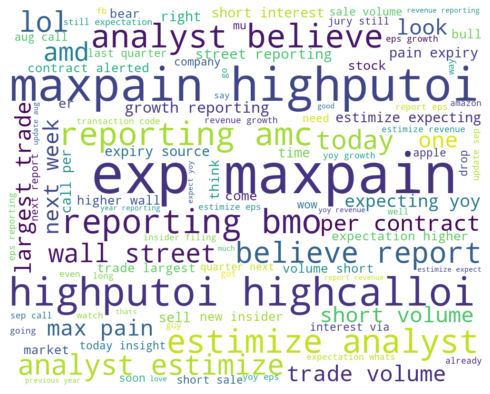

In [60]:
#plot a wordcloud of all words
plt.figure(figsize = (10,7), facecolor = None) 
wordcloud = WordCloud(height=800, width=1000, stopwords=STOPWORDS, background_color='white',max_words=100)
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#General words show words like maxpain, highputio show more of reporting and analyzing the stock.

##### The below code shows the word cloud based on sentiment scores

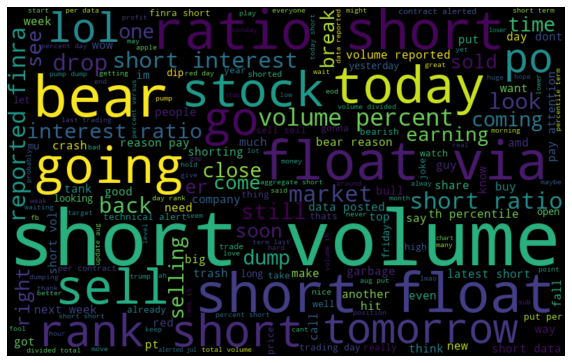

In [61]:
#wordcloud based on words where sentiment score is 0
words_0 =' '.join([text for text in jd['Tweet'][jd['Sentiment_score'] == 0]]) #makes a corpus of words where the sentiment score is 0
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_0)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#The words in the above wordcloud shows negative sentiments because of words like bear, dump, selling etc.

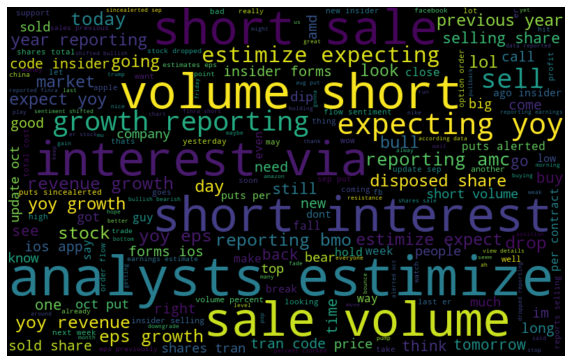

In [141]:
#wordcloud based on words where sentiment score is 1
words_1 =' '.join([text for text in jd['Tweet'][jd['Sentiment_score'] == 1]]) #makes a corpus of words where the sentiment score is 1
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#The wordcloud above shows that the sentiment 1 also has words towards negative side.

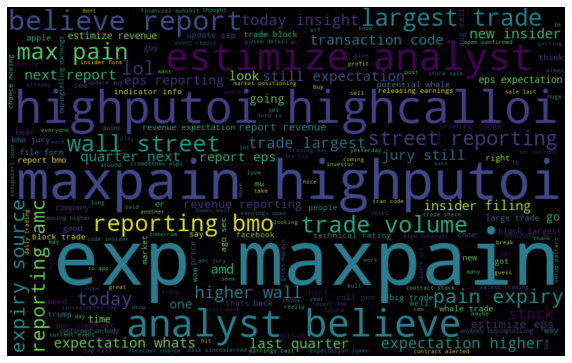

In [62]:
#wordcloud based on words where sentiment score is 2
words_2 =' '.join([text for text in jd['Tweet'][jd['Sentiment_score'] == 2]])#makes a corpus of words where the sentiment score is 2
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_2)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Wordcloud with sentiment 2 has words which don't show any particular sentiment.

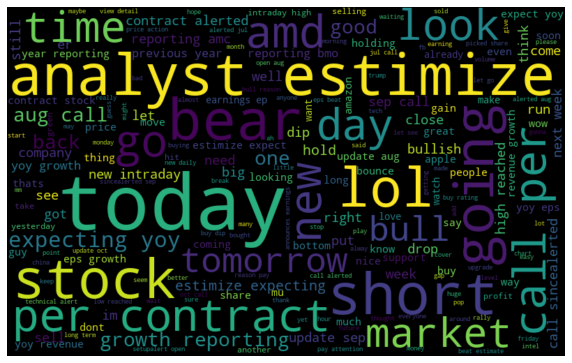

In [152]:
#wordcloud based on words where sentiment score is 3
words_3 =' '.join([text for text in jd['Tweet'][jd['Sentiment_score'] == 3]])#makes a corpus of words where the sentiment score is 3
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_3)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Wordcloud with sentiment 3 has words like estimize, going show that the sentiments tends to the positive.

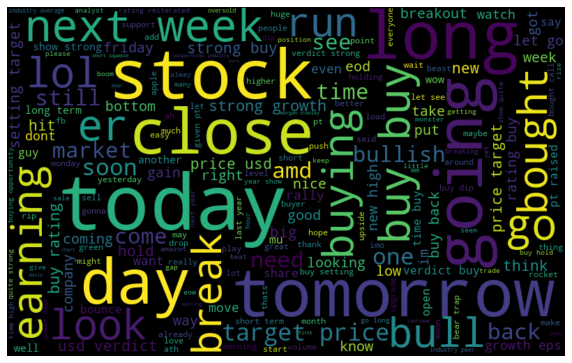

In [63]:
#wordcloud based on words where sentiment score is 4
words_4 =' '.join([text for text in jd['Tweet'][jd['Sentiment_score'] == 4]])#makes a corpus of words where the sentiment score is 4
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words_4)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Wordcloud with sentiment 4 has words like bought, buying, earnings which show very positive sentiments that people bought the stock.

##### The sentiment score plot

Text(0.5, 1.0, 'Sentiment Score')

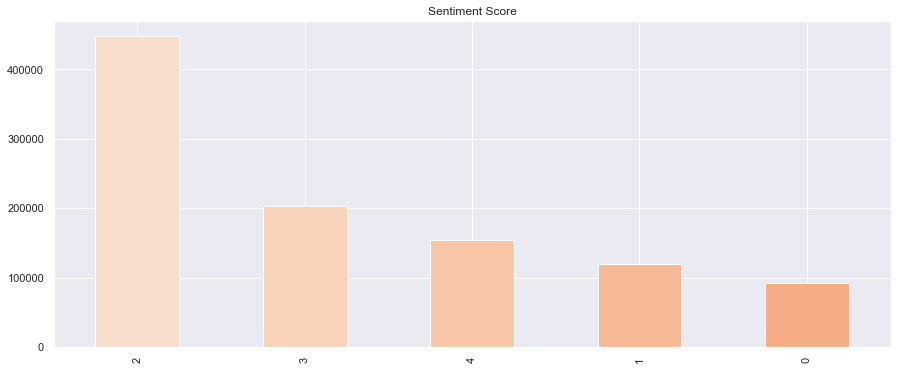

In [64]:
#plotting the sentiment score count
plt.figure(figsize=(15,6))
jd['Sentiment_score'].value_counts().plot(kind='bar',color=sns.color_palette('rocket_r',30))
plt.title('Sentiment Score')

In [ ]:
#The plot shows that most of the tweets have neutral sentiments.

##### Making the plot of the most frequently used words

In [65]:
#storing the freq words in the Tweets 
freq_words = FreqDist(list((" ".join(jd['Tweet']).split()))).most_common(50)

In [66]:
#entering it in a dataframe
jd_freq = pd.DataFrame(freq_words, columns=['f_words', 'f_frequency'])
print(jd_freq.head())

  f_words  f_frequency
0   short        60866
1       q        53658
2     buy        49694
3   today        48605
4    call        47719


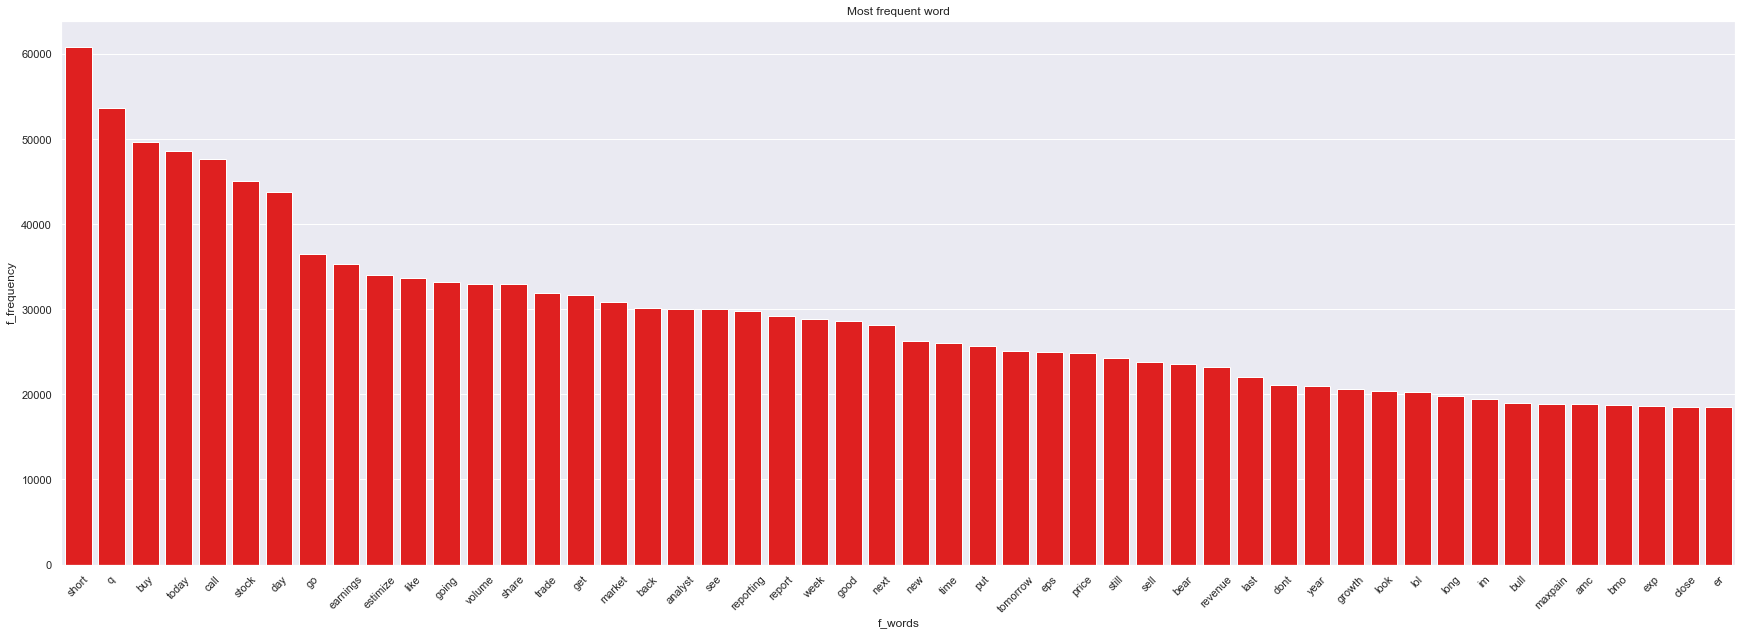

In [67]:
#plotting the frequent word chart
plt.figure(figsize=(30,10))
sns.barplot(x='f_words', y='f_frequency', data=jd_freq, color="red")
plt.xticks(rotation = 45)
plt.title('Most frequent word')
plt.show()

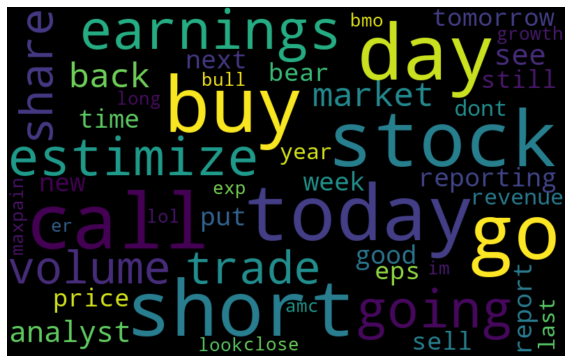

In [68]:
freq_words =' '.join([text for text in jd_freq['f_words']]) #corpus of most frequent words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(freq_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Words like buy, estimize, today are most frequently used in a tweet.

#### New feature to categorize sentiments as positive, neutral and negative

In [145]:
jd=jd.reset_index(drop=True)

In [146]:
#creating a new sentiment column according to the score
sentiment_polarity=[]
for i in range(jd.shape[0]):
    if jd['Sentiment_score'][i] == 0 or jd['Sentiment_score'][i] == 1: #if sentiment score is 0 or 1,we tag it negative
        sentiment_polarity.append("Negative")
    elif jd['Sentiment_score'][i] == 3 or jd['Sentiment_score'][i] == 4: #if sentiment score is 3 or 4, we tag it positive
        sentiment_polarity.append("Positive")
    else:
        sentiment_polarity.append("Neutral") #if sentiment score is 2 it's neutral

In [147]:
jd['Sentiment'] = sentiment_polarity # creating a new columns showing sentiments

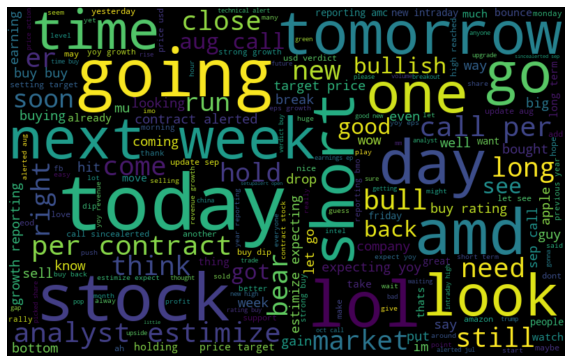

In [148]:
#Wordcloud with positive sentiment
from wordcloud import WordCloud, STOPWORDS
pos =' '.join([text for text in jd['Tweet'][jd['Sentiment'] == 'Positive']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#The above wordcloud show positive sentiments.

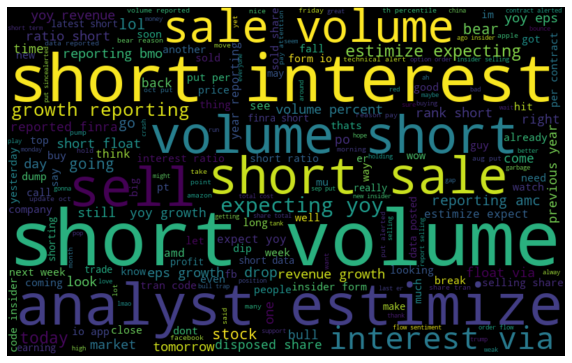

In [79]:
#Wordcloud with Negative Sentiments
neg =' '.join([text for text in jd['Tweet'][jd['Sentiment'] == 'Negative']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#The above wordcloud show negative sentiments.

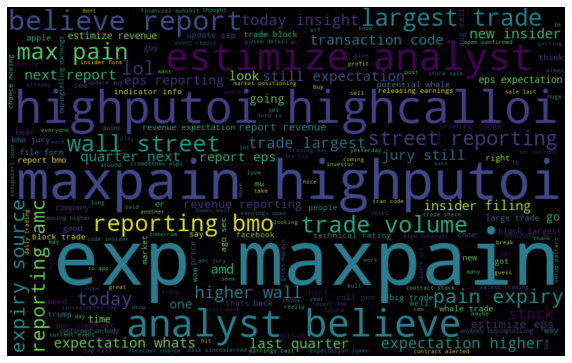

In [80]:
#Wordcloud with neutral comments
neu =' '.join([text for text in jd['Tweet'][jd['Sentiment'] == 'Neutral']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neu)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#The above wordcloud show neutral sentiments.

Text(0.5, 1.0, 'The Sentiment plot')

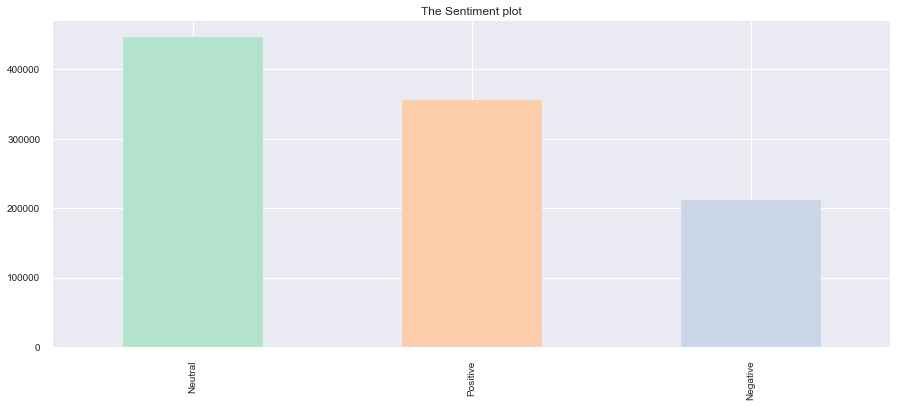

In [172]:
#the sentiment plot
plt.figure(figsize=(15,6))
jd['Sentiment'].value_counts()[:10].plot(kind='bar',color=sns.color_palette('Pastel2',30))
plt.title('The Sentiment plot')

In [164]:
#There are more neutral sentiments compare to positive and negative.